In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
# Structure of JSON dict: Evaluation Duration, system Memory Usage (MiB), CPU Usage (%), GPU Memory Usage (MiB)

with open("Resource Utilization - Compiled Data.json", "r") as f: 
    data = json.load(f)

print(str(data) + '\n\n')
parameters = list(data.keys())
print(parameters)
# Background: For Sel_GCN, the data was gathered for Map_0 and k = 5 which gave the best performance.
# For DGN, the data was gathered for Map_0 and k = 0 to override selectivity. 

{'Models': ['MAPR', 'DGN (k = 0, Map_0)', 'Sel_GCN (k = 5, Map_0)'], 'Evaluation Duration (s)': [5.578487396240234, 6869.68235373497, 3546.325671195984], 'System Memory (MiB)': [2613.153846153846, 2083.266666666667, 1441.6619047619047], 'CPU (%)': [3.446153846153846, 4.207619047619048, 2.1476190476190475], 'GPU Memory (MiB)': [84.92307692307692, 2435.4761904761904, 2436.095238095238]}


['Models', 'Evaluation Duration (s)', 'System Memory (MiB)', 'CPU (%)', 'GPU Memory (MiB)']


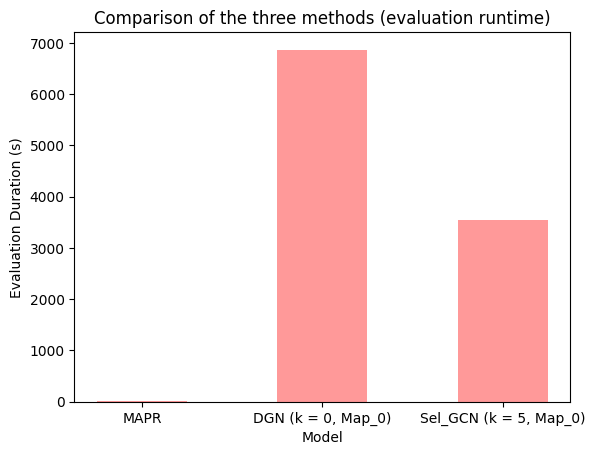

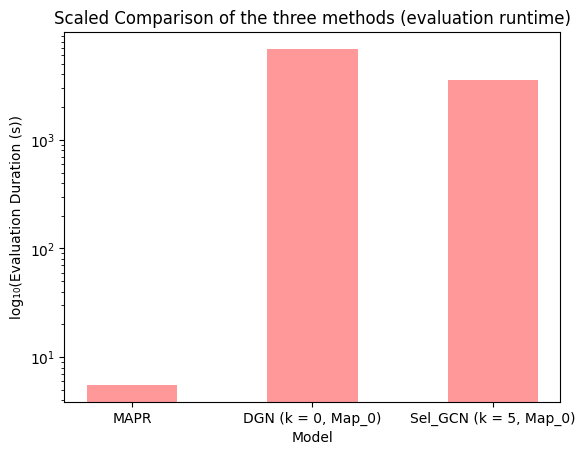

In [3]:
# Plot 1 - Comparing evaluation duration
plt.title("Comparison of the three methods (evaluation runtime)")
plt.bar(data.get(parameters[0]), data.get(parameters[1]), color="red", alpha=0.4, width = 0.5)        
plt.xlabel("Model")
plt.ylabel(parameters[1])
plt.savefig("Plots/Comparison of the three methods (runtime).png")
plt.show()

# Plot 2 - Logarithmic scale so that MAPR bar is visible
plt.title("Scaled Comparison of the three methods (evaluation runtime)")
plt.bar(data.get(parameters[0]), data.get(parameters[1]), color='red', alpha=0.4, width = 0.5)        
plt.xlabel("Model")
plt.ylabel("log\u2081\u2080({})".format(parameters[1]))
plt.yscale('log')
plt.savefig("Plots/log-Scaled Comparison of the three methods (runtime).png")
plt.show()

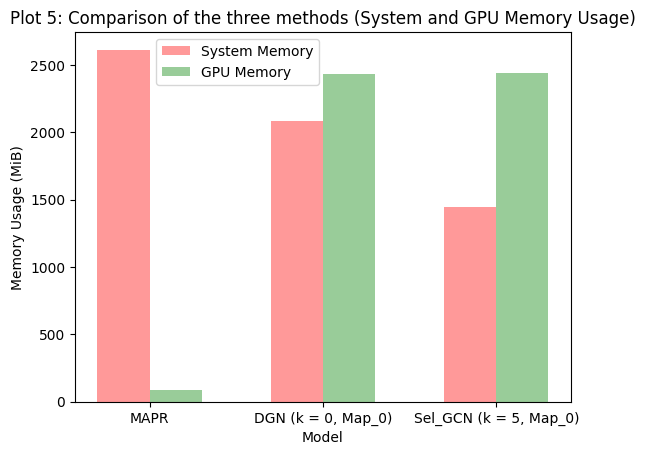

In [4]:
# Plot 3 - Comapring System memory usage
bar_width = 0.3
index = np.arange(len(data.get(parameters[0])))

plt.title("Plot 5: Comparison of the three methods (System and GPU Memory Usage)")
plt.bar(index, data.get(parameters[2]), bar_width, color="red", alpha=0.4, label='System Memory')  # System memory
plt.bar(index + bar_width, data.get(parameters[4]), bar_width, color="green", alpha=0.4, label='GPU Memory')  # GPU memory

plt.xlabel("Model")
plt.ylabel("Memory Usage (MiB)")
plt.xticks(index + bar_width / 2, data.get(parameters[0]))  # Set x-ticks to be in the middle of the bars
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 1))

plt.savefig("Plots/Comparison of the three methods (System and GPU Memory Usage).png")
plt.show()


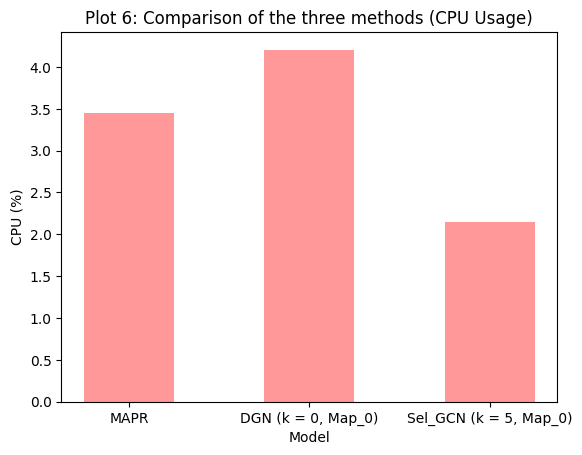

In [5]:
# Plot 4 - Comapring CPU usage
plt.title("Plot 6: Comparison of the three methods (CPU Usage)")
plt.bar(data.get(parameters[0]), data.get(parameters[3]), color="red", alpha=0.4, width=0.5)  
plt.xlabel("Model")
plt.ylabel(parameters[3])
plt.savefig("Plots/Comparison of the three methods (CPU Usage)")
plt.show()